In [19]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [20]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [22]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, Y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 2s 755us/step - loss: 0.2631 - accuracy: 0.9222
Epoch 2/3
1875/1875 [==============================] - 1s 744us/step - loss: 0.1058 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 1s 747us/step - loss: 0.0722 - accuracy: 0.9772


In [24]:
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 599us/step - loss: 0.0852 - accuracy: 0.9756
0.08516490459442139 0.975600004196167


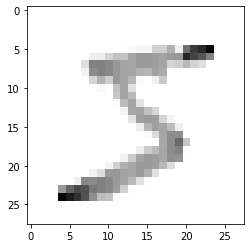

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()
print(X_train[0])

In [26]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [27]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [29]:
predictions = new_model.predict([X_test])

In [30]:
print(predictions)

[[2.4966798e-08 1.2081010e-08 6.1680616e-06 ... 9.9995542e-01
  3.9853080e-07 6.5609793e-06]
 [3.6534203e-11 7.3690812e-06 9.9999022e-01 ... 6.8566925e-09
  8.6127443e-09 9.0928707e-15]
 [1.9717817e-07 9.9968088e-01 1.1062624e-05 ... 2.3081955e-04
  2.8442928e-05 7.6369815e-07]
 ...
 [1.9678397e-09 2.7461379e-06 1.3195767e-08 ... 1.2333848e-04
  2.7243033e-07 8.7181703e-05]
 [6.1915095e-08 1.1921427e-08 1.8159719e-07 ... 2.1183828e-06
  4.8731011e-04 1.6728105e-08]
 [1.4847703e-07 1.4435470e-06 8.7703683e-08 ... 1.4507184e-11
  1.1476380e-07 9.2956459e-10]]


In [31]:
import numpy as np

print(np.argmax(predictions[0]))

7


<function matplotlib.pyplot.show(close=None, block=None)>

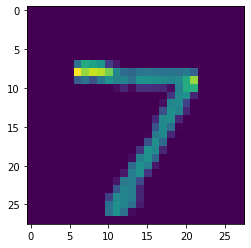

In [35]:
plt.imshow(X_test[0])
plt.show